## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataSet = pd.read_csv('data/nUsersCreditCardTxs.csv')

In [3]:
dataSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Notice that the variables are PCA transformed. Due to confidentiality issues the data set available online isn't having the actual feature names. Only Time and Amount are readable ones. While Amount is the total transaction amount, the Time column is the number of seconds elapsed between the transaction in consideration and the very first transaction of the dataset. 



In [4]:
dataSet.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data is clean as there aren't any null values

#### Data set limitation

In [5]:
dataSet['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class with value 1 indicate fradulent transaction and Class with value 0 indicate a legitimate transaction. 
The data set has only 492 fradulent transaction which is 0.17% of the data set. This is a very imbalanced data set.

## Data Visualization

### Histogram

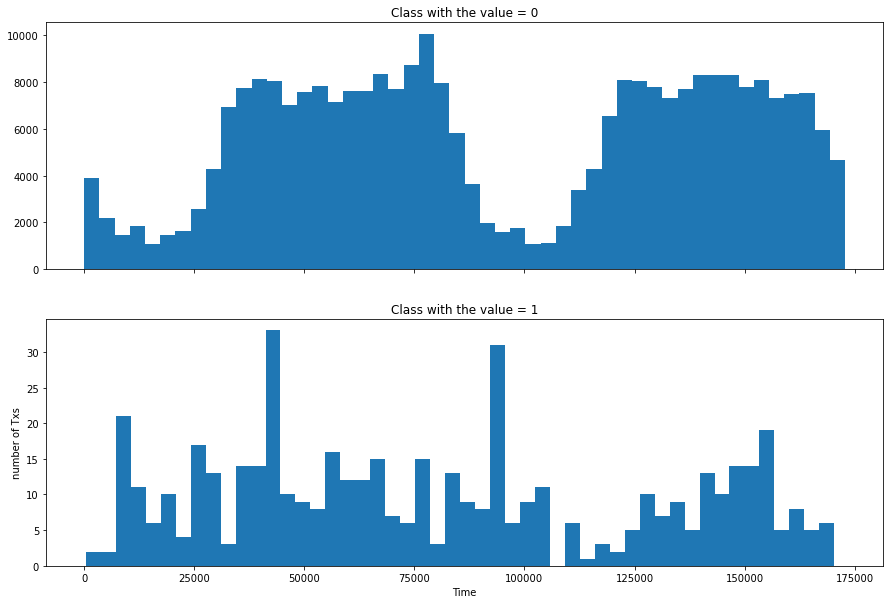

In [6]:
classValues = dataSet['Class'].value_counts().index

fig, (timeClass0Fig, timeClass1Fig) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

timeClass0Fig.hist(dataSet['Time'][dataSet['Class']==classValues[0]], bins=50)
timeClass0Fig.set_title('Class with the value = ' + str(classValues[0]))

timeClass1Fig.hist(dataSet['Time'][dataSet['Class']==classValues[1]], bins=50)
timeClass1Fig.set_title('Class with the value = ' + str(classValues[1]))

plt.xlabel('Time')
plt.ylabel('number of Txs')

plt.show()


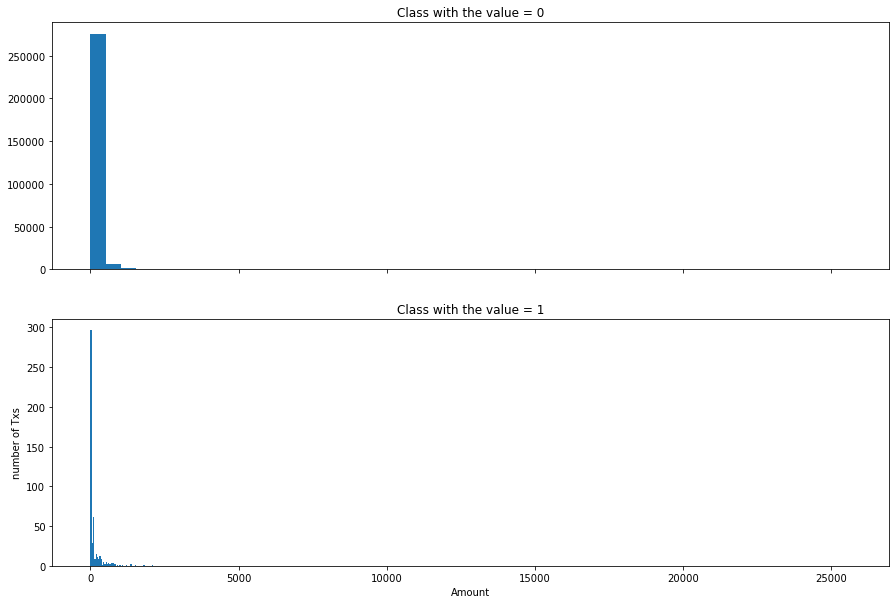

In [7]:
fig, (timeClass0Fig, timeClass1Fig) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

timeClass0Fig.hist(dataSet['Amount'][dataSet['Class']==classValues[0]], bins=50)
timeClass0Fig.set_title('Class with the value = ' + str(classValues[0]))

timeClass1Fig.hist(dataSet['Amount'][dataSet['Class']==classValues[1]], bins=50)
timeClass1Fig.set_title('Class with the value = ' + str(classValues[1]))

plt.xlabel('Amount')
plt.ylabel('number of Txs')

plt.show()

### Correlation

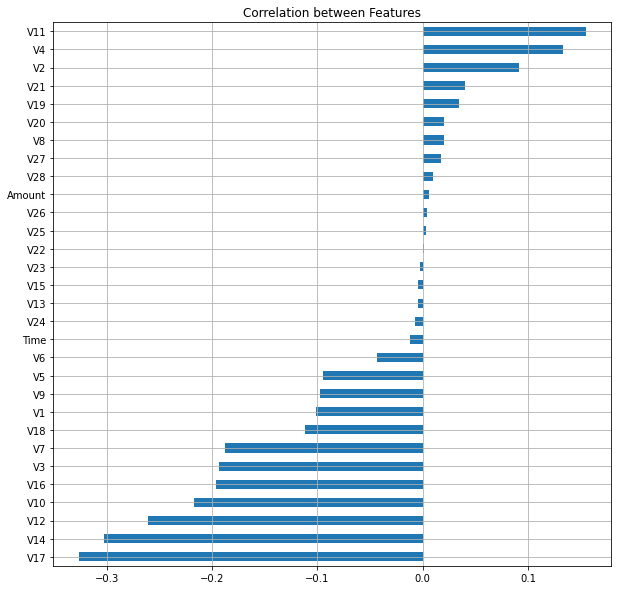

In [8]:
plt.figure(figsize=(10,10))
corr = dataSet.corr()['Class'].sort_values().drop('Class')
corr.plot(kind='barh')
plt.title('Correlation between Features')
plt.grid(True)
plt.show()

## Separating the data into featured and dependent variable

In [9]:
df = dataSet[dataSet['Class'] == 1]
df1 = dataSet[dataSet['Class']== 0]
df1.drop(df1.index[2000: ],0,inplace=True)
nUsersCreditCardTxs = pd.concat([df, df1], axis=0)


In [10]:
nUsersCreditCardTxs.drop(['V11','V4','V2','V21','V19','V20','V8','V27','V28','Amount','V26','V25','V22','V23','V15','V13','V24','Time','V6','V17','V14'], axis=1, inplace=True)

x = nUsersCreditCardTxs.iloc[: , :-1].values
y = nUsersCreditCardTxs.iloc[: , -1].values


In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, stratify=y, random_state=24)

In [12]:
from sklearn.preprocessing import StandardScaler

standardScaler=StandardScaler()
x_train=standardScaler.fit_transform(x_train)
x_test=standardScaler.transform(x_test)

## Model building

## Model 1 -  Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lrModel = LogisticRegression()
lrModel = lrModel.fit(x_train,y_train)
y_pred = lrModel.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracyLR = accuracy_score(y_test,y_pred)
confusionMatrixLR = confusion_matrix(y_test,y_pred)

In [15]:
print(f"Accuracy is {accuracyLR*100}")
print("Confusion Matrix is ")
print(confusionMatrixLR)

Accuracy is 95.99198396793587
Confusion Matrix is 
[[399   1]
 [ 19  80]]


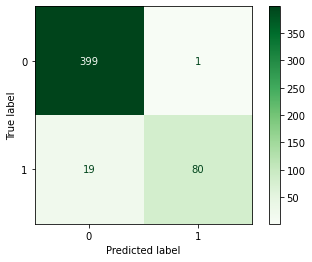

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lrModel, x_test, y_test, cmap=plt.cm.Greens)
plt.show()

## Model 2 - Linear SVM (Support Vector Machine)

In [17]:
from sklearn import svm

svmModel = svm.SVC(kernel='linear')


In [18]:
svmModel.fit(x_train, y_train)


SVC(kernel='linear')

In [19]:
y_pred = svmModel.predict(x_test)

In [20]:
accuracySVM = accuracy_score(y_test,y_pred)
confusionMatrixSVM = confusion_matrix(y_test,y_pred)

In [21]:
print(f"Accuracy is {accuracySVM*100}")
print("Confusion Matrix is ")
print(confusionMatrixSVM)

Accuracy is 95.39078156312625
Confusion Matrix is 
[[399   1]
 [ 22  77]]


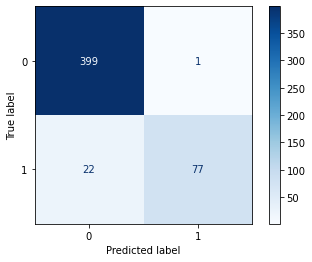

In [22]:
plot_confusion_matrix(svmModel, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Model 3 - Decision Tree

In [23]:
from sklearn import tree

dtModel = tree.DecisionTreeClassifier()
dtModel = dtModel.fit(x_train,y_train)
y_pred = dtModel.predict(x_test)

In [24]:
accuracyDt=accuracy_score(y_test,y_pred)
confusionMatrixDt=confusion_matrix(y_test,y_pred)

In [25]:
print(f"Accuracy is {accuracyDt*100}")
print("Confusion Matrix is ")
print(confusionMatrixDt)

Accuracy is 95.39078156312625
Confusion Matrix is 
[[392   8]
 [ 15  84]]


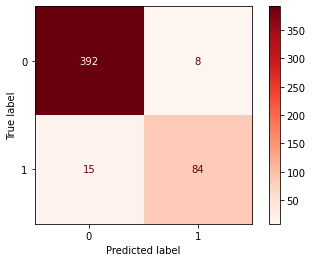

In [26]:
plot_confusion_matrix(dtModel, x_test, y_test,cmap=plt.cm.Reds)
plt.show()

## Model 4 -  Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfModel =RandomForestClassifier()
rfModel = rfModel.fit(x_train,y_train)
y_pred = rfModel.predict(x_test)

In [28]:
accuracyRf=accuracy_score(y_test,y_pred)
confusionMatrixRf=confusion_matrix(y_test,y_pred)

In [29]:
print(f"Accuracy is {accuracyRf*100}")
print("Confusion Matrix is ")
print(confusionMatrixRf)

Accuracy is 96.59318637274549
Confusion Matrix is 
[[399   1]
 [ 16  83]]


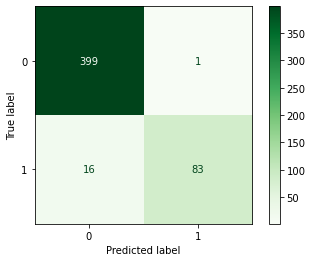

In [30]:
plot_confusion_matrix(rfModel, x_test, y_test,cmap=plt.cm.Greens)
plt.show()

## Model 5 - VotingClassifier

In [31]:
from sklearn.ensemble import VotingClassifier

vcModel = VotingClassifier(estimators=[('rf', rfModel),('dt', dtModel)], voting='hard')
vcModel = vcModel.fit(x_train,y_train)
y_pred = vcModel.predict(x_test)

In [32]:
accuracyVC = accuracy_score(y_test,y_pred)
confusionMatrixVC = confusion_matrix(y_test,y_pred)

In [33]:
print(f"Accuracy is {accuracyVC*100}")
print("Confusion Matrix is ")
print(confusionMatrixVC)

Accuracy is 96.39278557114228
Confusion Matrix is 
[[399   1]
 [ 17  82]]


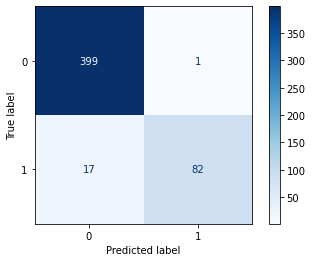

In [34]:
plot_confusion_matrix(vcModel, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## Model 6 - XGBoost

In [35]:
import xgboost as xgb

#xgbModel = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)
xgbModel = xgb.XGBClassifier()
xgbModel = xgbModel.fit(x_train,y_train)
y_pred = xgbModel.predict(x_test)

[15:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
accuracyXGB = accuracy_score(y_test,y_pred)
confusionMatrixXGB = confusion_matrix(y_test,y_pred)

In [37]:
print(f"Accuracy is {accuracyXGB*100}")
print("Confusion Matrix is ")
print(confusionMatrixXGB)

Accuracy is 96.39278557114228
Confusion Matrix is 
[[398   2]
 [ 16  83]]


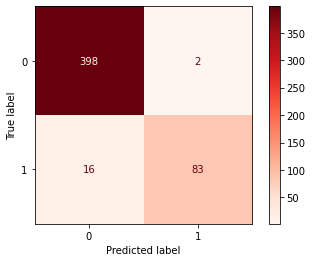

In [38]:
plot_confusion_matrix(xgbModel, x_test, y_test,cmap=plt.cm.Reds)
plt.show()

In [39]:
print(f"Model 1 - Logistic Regression model accuracy is {accuracyLR*100}")
print(f"Model 2 - Linear SVM model accuracy is {accuracySVM*100}")
print(f"Model 3 - Decision tree model accuracy is {accuracyDt*100}")
print(f"Model 4 - Random forest classifier model accuracy is {accuracyRf*100}")
print(f"Model 5 - Voting classifier model accuracy is {accuracyVC*100}")
print(f"Model 6 - XGBoost model accuracy is {accuracyXGB*100}")

Model 1 - Logistic Regression model accuracy is 95.99198396793587
Model 2 - Linear SVM model accuracy is 95.39078156312625
Model 3 - Decision tree model accuracy is 95.39078156312625
Model 4 - Random forest classifier model accuracy is 96.59318637274549
Model 5 - Voting classifier model accuracy is 96.39278557114228
Model 6 - XGBoost model accuracy is 96.39278557114228


Given the data set, comparing accuracy of the models from above, the suggested model is Random forest classifier or XGBoost. For simplicity Random forest classifier model has been saved for later execution.

In [40]:
import joblib

joblib.dump(rfModel, "./random_forest.joblib")

#Loading the model at a later execution stage
#loaded_rfModel = joblib.load("./random_forest.joblib")

['./random_forest.joblib']